In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
X, y = load_iris(return_X_y=True, as_frame=True)

In [3]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [25]:
 X['spcies'] = y

In [26]:
df = X

In [28]:
import seaborn as sns

D:\Data Science\ElectorPI-Initiative\envs\sklearn_spv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


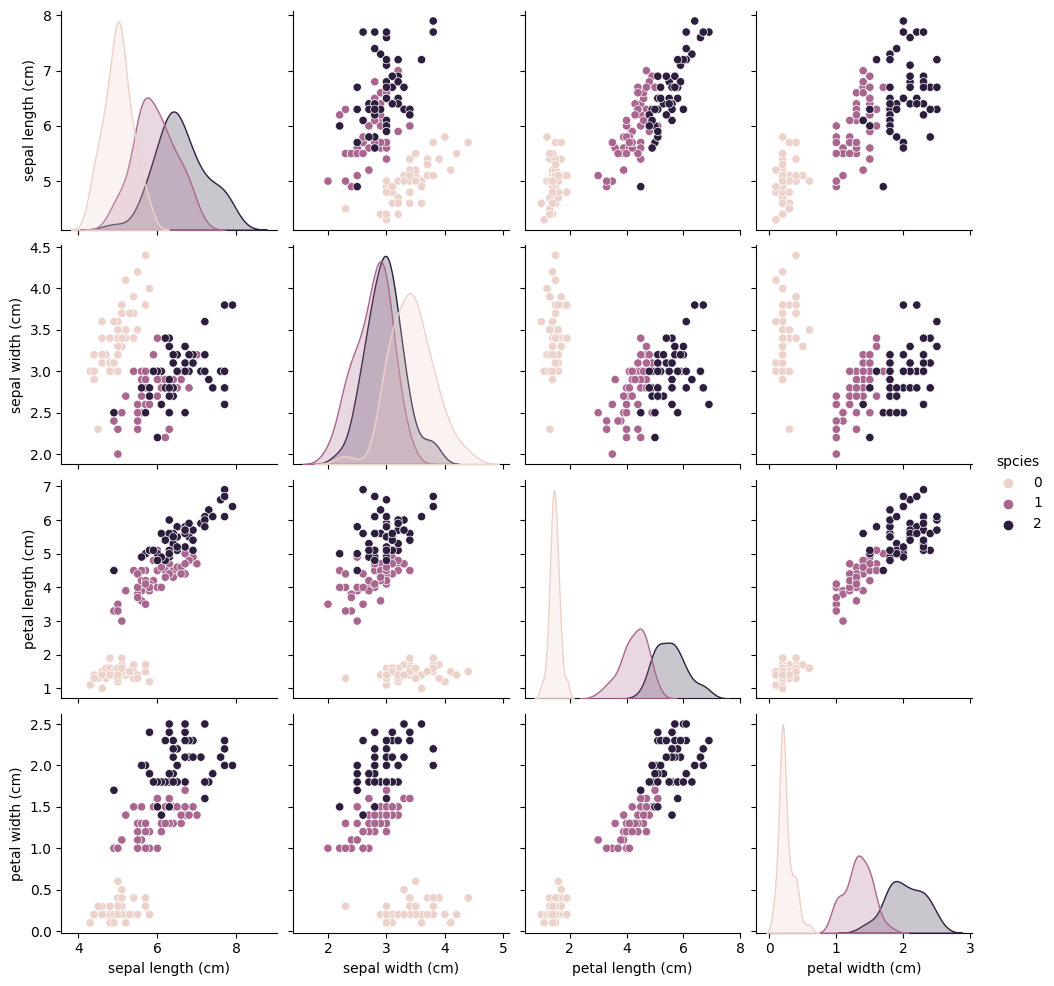

In [30]:
sns.pairplot(X,hue='spcies')

In [32]:
X = X.drop('spcies',axis=1)

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
X_scl = StandardScaler().fit_transform(X)

#### PCA ( Principle Component Analysis )

In [35]:
from sklearn.decomposition import PCA

In [45]:
dim_red = PCA(n_components=2)

In [46]:
X_pca = dim_red.fit_transform(X_scl)

In [47]:
dim_red.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [48]:
dim_red.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [49]:
dim_red.get_feature_names_out()

array(['pca0', 'pca1'], dtype=object)

In [50]:
pca_df = pd.DataFrame(X_pca,columns=dim_red.get_feature_names_out())

In [51]:
pca_df.head()

,pca0,pca1
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [52]:
pca_df['spcies'] = y

D:\Data Science\ElectorPI-Initiative\envs\sklearn_spv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


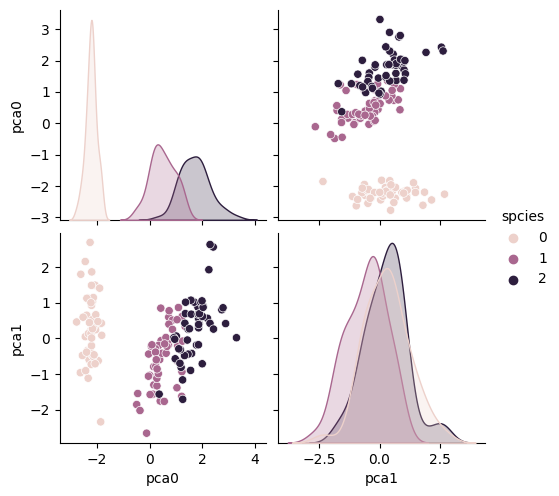

In [53]:
sns.pairplot(pca_df,hue='spcies');

#### TSNE (T-distributed Stochastic Neighbor Embedding)

In [58]:
from sklearn.manifold import TSNE

In [89]:
dim_red_tsne = TSNE(perplexity=10)

In [90]:
X_tsne = dim_red_tsne.fit_transform(X_scl)

In [91]:
dim_red_tsne.get_feature_names_out()

array(['tsne0', 'tsne1'], dtype=object)

In [92]:
tsne_df = pd.DataFrame(X_tsne,columns=dim_red_tsne.get_feature_names_out())

In [93]:
tsne_df['spcies'] = y

In [94]:
tsne_df.head()

,tsne0,tsne1,spcies
0,-26.890738,19.506777,0
1,-34.832916,3.444329,0
2,-30.220234,5.312893,0
3,-31.243097,3.194903,0
4,-25.166172,20.851151,0


D:\Data Science\ElectorPI-Initiative\envs\sklearn_spv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


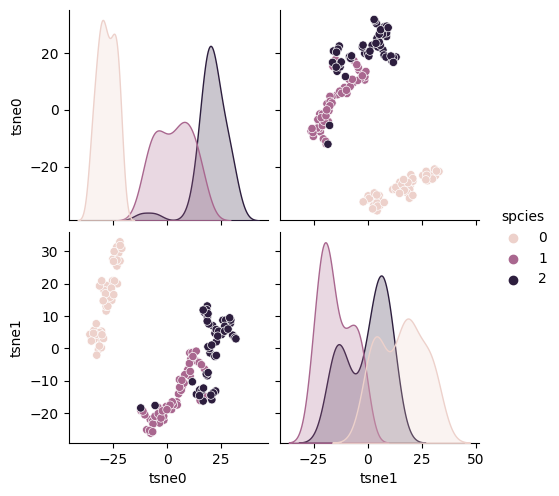

In [95]:
sns.pairplot(tsne_df,hue='spcies');